In [1]:
import torch

In [3]:
import numpy as np

# 样本数据
data = np.array([31.76, 28.86, 30.84, 29.20, 31.07, 30.23])

# 计算样本均值
mean = np.mean(data)

# 计算样本标准差（Bessel校正后的标准差）
std_dev = np.std(data, ddof=1)

print(f"样本均值: {mean}")
print(f"样本标准差: {std_dev}")


样本均值: 30.326666666666668
样本标准差: 1.1225269113329392


In [4]:
a=0.33/(1.1/np.sqrt(6))
a

0.7348469228349533

a=0.33/(1.1/np.sqrt(6))

In [5]:
from scipy.stats import norm
z = norm.ppf(1 - 0.05)
z

1.6448536269514722

In [2]:
weights = torch.tensor([0.5, 0.2, 0.4, 0.3, 0.1])
pdf = weights / torch.sum(weights, -1, keepdim=True)
pdf

tensor([0.3333, 0.1333, 0.2667, 0.2000, 0.0667])

In [3]:
cdf = torch.cumsum(pdf, -1)
cdf

tensor([0.3333, 0.4667, 0.7333, 0.9333, 1.0000])

In [4]:
cdf = torch.cat([torch.zeros_like(cdf[..., :1]), cdf], -1)
cdf

tensor([0.0000, 0.3333, 0.4667, 0.7333, 0.9333, 1.0000])

In [5]:
!pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('/Users/shenqianfan/Desktop/大二下/python/hw/csv (3).csv')
data = data.drop(['Wall time'], axis=1)
print(data.head())  # 打印数据的前几行以确认结构
print(data.dtypes)  # 查看各列数据类型
data=data.to_numpy()
steps = data[:, 0]
values = data[:, 1]
smoothed_values = pd.Series(values).rolling(window=2, center=True).mean()
smoothed_values=smoothed_values.to_numpy()

   Step     Value
0     1  3.207145
1     2  3.044510
2     3  2.824857
3     4  2.800331
4     5  2.691521
Step       int64
Value    float64
dtype: object


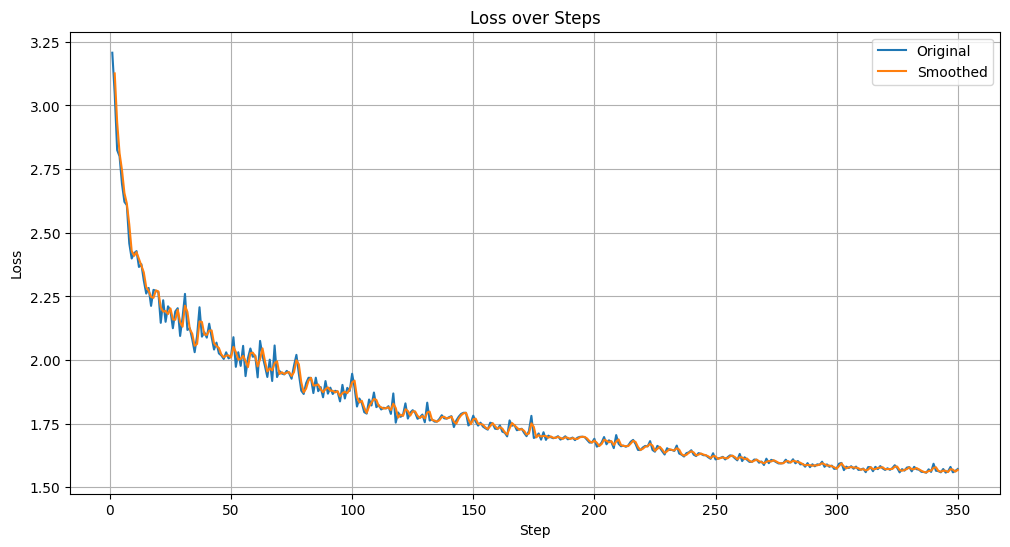

In [11]:
plt.figure(figsize=(12, 6))  # 设置图形的显示大小
plt.plot(steps, values, label='Original')
plt.plot(steps, smoothed_values, linestyle='-', label='Smoothed')
plt.title('Loss over Steps')  # 添加标题
plt.xlabel('Step')  # 添加X轴标签
plt.ylabel('Loss')  # 添加Y轴标签
plt.legend()
plt.grid(True)  # 显示网格
plt.show()  # 显示图形